In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv(path)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Identify categorical and numerical features

In [3]:
cols = df.columns

num_cols = df._get_numeric_data().columns.to_list()
print(num_cols)

# get complement of set of columns and numerical columns
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)

['math score', 'reading score', 'writing score']
['gender', 'test preparation course', 'parental level of education', 'lunch', 'race/ethnicity']


# Display standard deviation, variance, and mean of numerical variables/features math score, reading score, writing score

In [4]:
# calculate mean of writing score, reading score, and math score

num_cols_desc = df.describe()
print(num_cols_desc)

math_median = df['math score'].median()
read_median = df['reading score'].median()
write_median = df['writing score'].median()

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


## calculate interquartile range of numerical variables

In [5]:
_75_p = num_cols_desc.loc['75%', ['math score', 'reading score', 'writing score']]
print(f'{_75_p}\n')

_25_p = num_cols_desc.loc['25%', ['math score', 'reading score', 'writing score']]
print(f'{_25_p}\n')

# calculate interquartile range of each numerical variable
iqr = _75_p - _25_p
print(f'interquartile range of each feature:\n{iqr}\n')

math score       77.0
reading score    79.0
writing score    79.0
Name: 75%, dtype: float64

math score       57.00
reading score    59.00
writing score    57.75
Name: 25%, dtype: float64

interquartile range of each feature:
math score       20.00
reading score    20.00
writing score    21.25
dtype: float64



## find upper bound and lower bound without the outliers

In [6]:
upper_bound = _75_p + (1.5 * iqr)
lower_bound = _25_p - (1.5 * iqr)
print(f'lower bounds/whiskers are:\n{lower_bound}\n')
print(f'upper bounds/whiskers are:\n{upper_bound}')

lower bounds/whiskers are:
math score       27.000
reading score    29.000
writing score    25.875
dtype: float64

upper bounds/whiskers are:
math score       107.000
reading score    109.000
writing score    110.875
dtype: float64


## once upper and lower bounds have been calculated anything **greater or lesser** than these bounds respectively are the outliers

In [7]:
math_outliers = df.loc[(df['math score'] <= lower_bound['math score']) | (df['math score'] >= upper_bound['math score']),'math score']
math_outliers

17     18
59      0
91     27
145    22
338    24
363    27
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

In [8]:
read_outliers = df.loc[(df['reading score'] <= lower_bound['reading score']) | (df['reading score'] >= upper_bound['reading score']),'reading score']
read_outliers

59     17
76     26
211    28
327    23
596    24
601    29
896    29
980    24
Name: reading score, dtype: int64

In [9]:
write_outliers = df.loc[(df['writing score'] <= lower_bound['writing score']) | (df['writing score'] >= upper_bound['writing score']),'writing score']
write_outliers

59     10
76     22
327    19
596    15
980    23
Name: writing score, dtype: int64

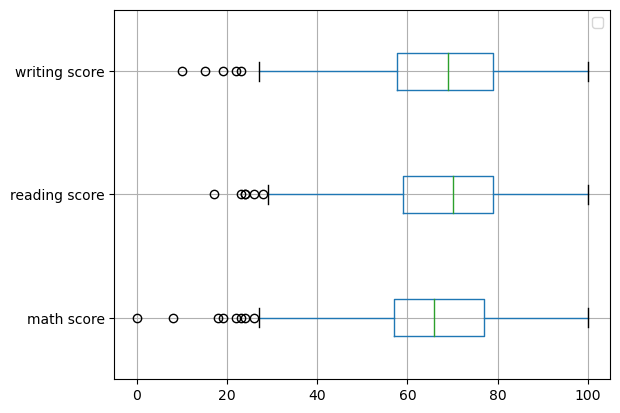

In [10]:
df.boxplot(column=num_cols, vert=False)
plt.legend()
plt.show()

# Display mode, median of categorical variables/features

- There are no outlier detection methods for categorical data. The notion means nothing in this case. You might think like that:
- You have a sample of 10 with 9 females and 1 male. You might think the male is the outlier it's just the composition of your sample, not an outlier.
- For an outlier to exist there must be a measure of distance between the items. Have a look at this for more information.
- Please suggest a valid logic to solve the issue. I Also tried to distribute the data based on frquency but i'm unable to assign a thresold as im unable to find a value to consider the data as outliers.Providing a way to find thresold also can help.
- A solution could be to just value_counts your column so then you have the frequency of each element.

<BarContainer object of 2 artists>
gender
<BarContainer object of 2 artists>
test preparation course
<BarContainer object of 6 artists>
parental level of education
<BarContainer object of 2 artists>
lunch
<BarContainer object of 5 artists>
race/ethnicity


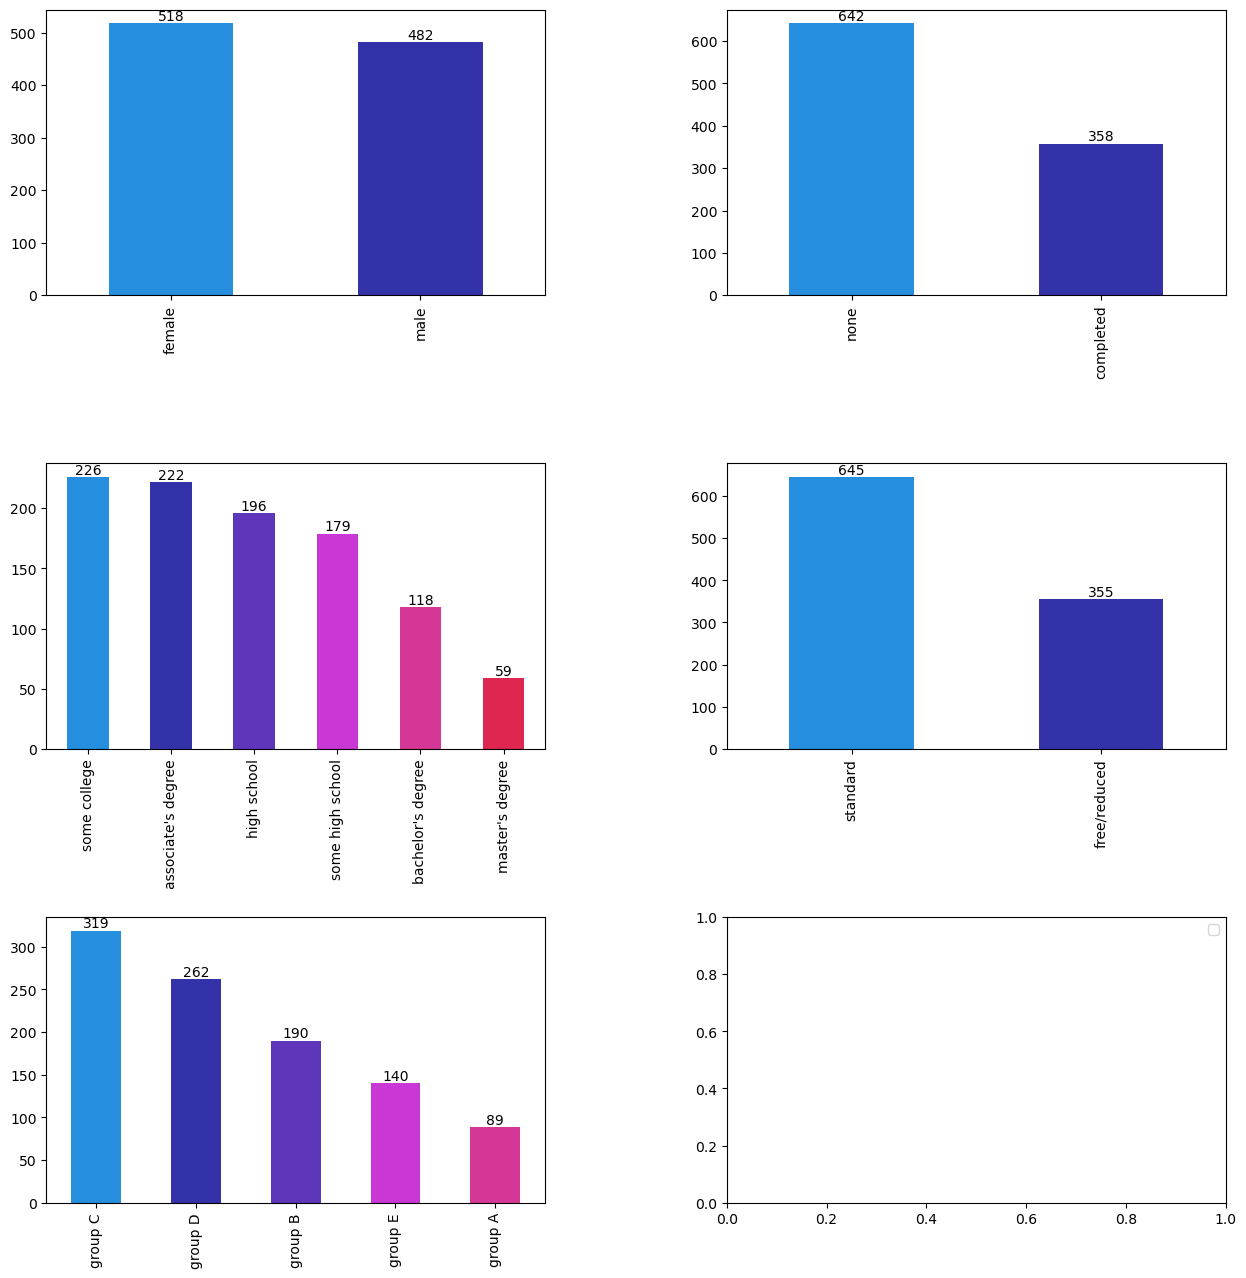

In [46]:
# since 
fig, axes = plt.subplots(3, 2, figsize=(15, 15), gridspec_kw={'width_ratios': [3, 3], 'height_ratios': [3, 3, 3]})
axes = axes.flat
fig.tight_layout(pad=10)

for index, col in enumerate(cat_cols):
    
    # list all categorical columns
    ax = df[col].value_counts().plot(kind='bar', ax=axes[index], color=['#268ede', '#3432a8', '#5e36ba', '#c937d4', '#d43795', '#de2651'])
    
    # annotate bars
    print(ax.containers[0])
    ax.bar_label(ax.containers[0])
    
    print(col)

plt.legend()
plt.show()